# r,z cameras for Bootcalib code

In [11]:
%matplotlib inline

In [12]:
# imports
try:
    import seaborn as sns; sns.set(context="notebook",font_scale=2)
except:
    pass

from desispec import bootcalib as desiboot
from desiutil import funcfits as dufits
from astropy.io import fits
from astropy.stats import sigma_clip

import numpy as np
from astropy.modeling import models, fitting

## r camera

### Flat tracing

#### Read flat

In [13]:
fiberflat = '/Users/xavier/DESI/Wavelengths/pix-r0-00000001.fits'
flat_hdu = fits.open(fiberflat)
header = flat_hdu[0].header
flat = flat_hdu[0].data
ny = flat.shape[0]

#### Find fibers

In [14]:
xpk, ypos, cut = desiboot.find_fiber_peaks(flat)

INFO:bootcalib.py:657:find_fiber_peaks: starting


INFO:DESI:starting


INFO:bootcalib.py:694:find_fiber_peaks: Found 500 fibers


INFO:DESI:Found 500 fibers


INFO:bootcalib.py:702:find_fiber_peaks: Found 20 bundles


INFO:DESI:Found 20 bundles


In [ ]:
tst = True
if tst:
    xpk = xpk[0:5]

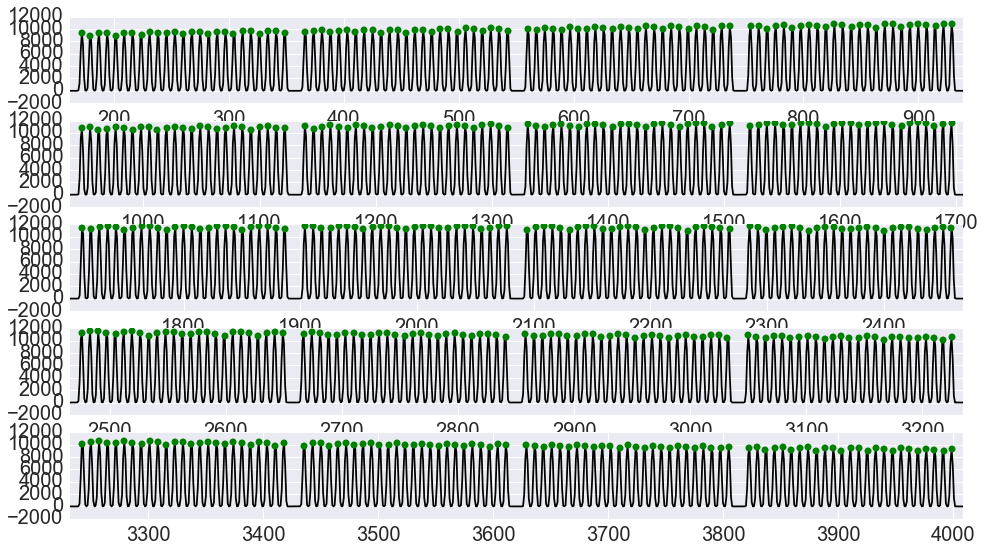

In [15]:
reload(desiboot)
desiboot.qa_fiber_peaks(xpk, cut)

#### Trace the fiber flat spectra

In [16]:
# Crude first
xset, xerr = desiboot.trace_crude_init(flat,xpk,ypos)
# Polynomial fits
xfit, fdicts = desiboot.fit_traces(xset,xerr)

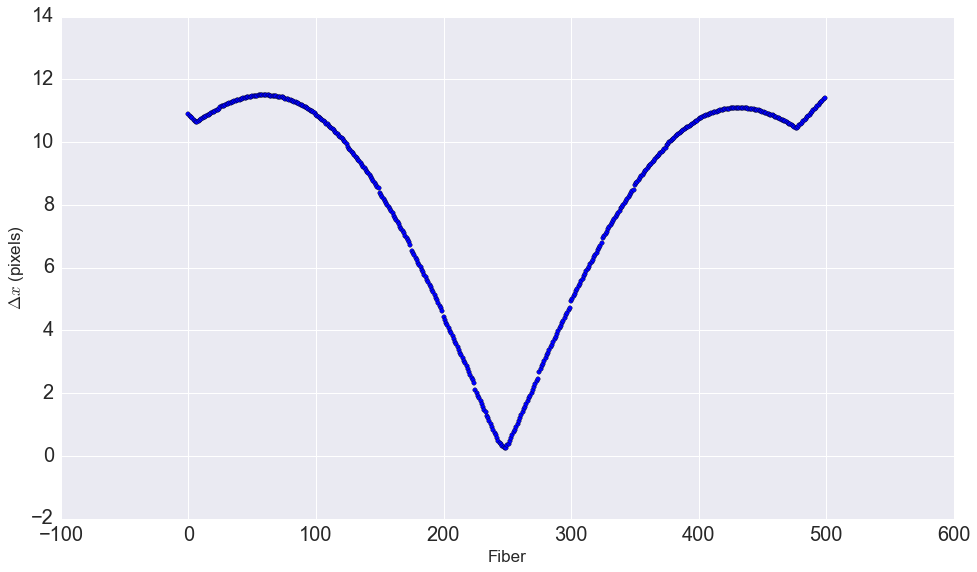

In [17]:
# QA
desiboot.qa_fiber_Dx(xfit, fdicts)

#### Model the PSF with Gaussian

In [18]:
gauss = desiboot.fiber_gauss(flat,xfit,xerr)

INFO:bootcalib.py:580:fiber_gauss: Working on fiber 0 of 500


INFO:DESI:Working on fiber 0 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 25 of 500


INFO:DESI:Working on fiber 25 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 50 of 500


INFO:DESI:Working on fiber 50 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 75 of 500


INFO:DESI:Working on fiber 75 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 100 of 500


INFO:DESI:Working on fiber 100 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 125 of 500


INFO:DESI:Working on fiber 125 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 150 of 500


INFO:DESI:Working on fiber 150 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 175 of 500


INFO:DESI:Working on fiber 175 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 200 of 500


INFO:DESI:Working on fiber 200 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 225 of 500


INFO:DESI:Working on fiber 225 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 250 of 500


INFO:DESI:Working on fiber 250 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 275 of 500


INFO:DESI:Working on fiber 275 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 300 of 500


INFO:DESI:Working on fiber 300 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 325 of 500


INFO:DESI:Working on fiber 325 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 350 of 500


INFO:DESI:Working on fiber 350 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 375 of 500


INFO:DESI:Working on fiber 375 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 400 of 500


INFO:DESI:Working on fiber 400 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 425 of 500


INFO:DESI:Working on fiber 425 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 450 of 500


INFO:DESI:Working on fiber 450 of 500


INFO:bootcalib.py:580:fiber_gauss: Working on fiber 475 of 500


INFO:DESI:Working on fiber 475 of 500


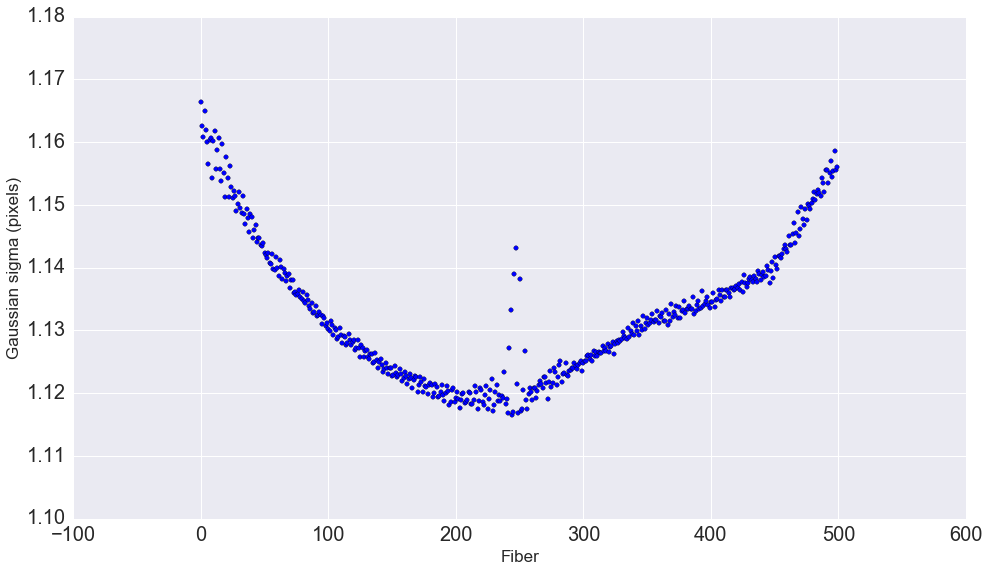

In [19]:
reload(desiboot)
desiboot.qa_fiber_gauss(gauss)

### Arc

#### Wavelength info

In [3]:
import desimodel.io

In [4]:
desi_psf = desimodel.io.load_psf('r')

In [5]:
desi_psf.wdisp(0,4500.) # fiber, wavelength

1.2646154527080502

In [6]:
wave0 = desi_psf.wavelength(0,np.arange(desi_psf.npix_y))

In [7]:
np.min(wave0), np.max(wave0)

(5569.6355533734004, 7745.6051833427209)

In [23]:
np.abs(wave0[0]-wave0[-1])/desi_psf.npix_y

0.52712442586466102

#### Read arc

In [38]:
arcfile = '/Users/xavier/DESI/Wavelengths/pix-r0-00000000.fits'
arc_hdu = fits.open(arcfile)
arc = arc_hdu[0].data

#### Extract arc

In [41]:
all_spec = desiboot.extract_sngfibers_gaussianpsf(arc,xfit,gauss,verbose=False)

#### Linelist

In [99]:
reload(desiboot)
camera = header['CAMERA']
llist = desiboot.load_arcline_list(camera)
dlamb, wmark, gd_lines = desiboot.load_gdarc_lines(camera)

INFO:bootcalib.py:446:load_arcline_list: Rejecting select HgI lines


INFO:DESI:Rejecting select HgI lines


INFO:bootcalib.py:446:load_arcline_list: Rejecting select NeI lines


INFO:DESI:Rejecting select NeI lines


#### Solve

In [100]:
ii=50

#### Find Lines

In [101]:
spec = all_spec[:,ii]
# Find Lines
pixpk = desiboot.find_arc_lines(spec)

In [102]:
pixpk

array([  316.04267615,   353.48844449,   463.78140736,   516.38110957,
         629.36624223,   684.65425114,   782.96992154,   863.22132435,
         902.82935657,   961.6696063 ,   988.06339773,  1025.43406055,
        1123.41430805,  1213.57672628,  1283.81791943,  1338.31666018,
        1427.83938262,  1463.39491006,  1530.40500551,  1656.73495794,
        1705.78860359,  1829.15110895,  1977.87440636,  2051.06569286,
        2412.74476416,  2455.30875233,  2637.68006792,  2653.88530296,
        2705.7636771 ,  2749.61453976,  2929.88848876,  3070.21637363,
        3456.75864973,  3524.55209096,  3557.68387905,  3652.68933903,
        3669.35678319])

#### Match a set of 5 gd_lines to detected lines

In [103]:
id_dict = desiboot.id_arc_lines(pixpk,gd_lines,dlamb,wmark)

In [104]:
id_dict

{u'dlamb': 0.527,
 u'first_id_idx': [4, 10, 17, 19, 23],
 u'first_id_pix': array([  629.36624223,   988.06339773,  1463.39491006,  1656.73495794,
         2051.06569286]),
 u'first_id_wave': array([ 5944.834,  6143.062,  6402.246,  6506.528,  6717.043]),
 u'fit': {'coeff': array([ -8.07091105e+03,   5.64846739e-01,   1.40444849e-05]),
  'func': u'polynomial',
  'order': 2,
  'xmax': 1.0,
  'xmin': 0.0},
 'guess': 17,
 u'icen': 4,
 'im1': 10,
 'im2': 4,
 'ip1': 19,
 'ip2': 23,
 'rms': 0.071239310822709928,
 u'wmark': 6402.246}

#### Find the other good ones

In [105]:
desiboot.add_gdarc_lines(id_dict, pixpk, gd_lines)

In [106]:
id_dict

{u'dlamb': 0.527,
 u'first_fit': {'coeff': array([ -8.07091105e+03,   5.64846739e-01,   1.40444849e-05]),
  'func': u'polynomial',
  'order': 2,
  'xmax': 1.0,
  'xmin': 0.0},
 u'first_id_idx': [4, 10, 17, 19, 23],
 u'first_id_pix': array([  629.36624223,   988.06339773,  1463.39491006,  1656.73495794,
         2051.06569286]),
 u'first_id_wave': array([ 5944.834,  6143.062,  6402.246,  6506.528,  6717.043]),
 u'fit': {'coeff': array([ -3.83788044e+04,   7.58780033e+00,  -5.26030888e-04,
           1.37800486e-08]),
  'func': u'polynomial',
  'order': 3,
  'xmax': 1.0,
  'xmin': 0.0},
 'guess': 17,
 u'icen': 4,
 u'id_idx': [0, 3, 4, 10, 17, 19, 23, 25, 26, 32],
 u'id_pix': [316.0426761450247,
  516.38110957137224,
  629.36624222771206,
  988.06339773226307,
  1463.3949100603575,
  1656.7349579437584,
  2051.0656928629624,
  2455.3087523281611,
  2637.6800679225498,
  3456.7586497269904],
 u'id_wave': [5769.598,
  5881.8950000000004,
  5944.8339999999998,
  6143.0619999999999,
  6402.24

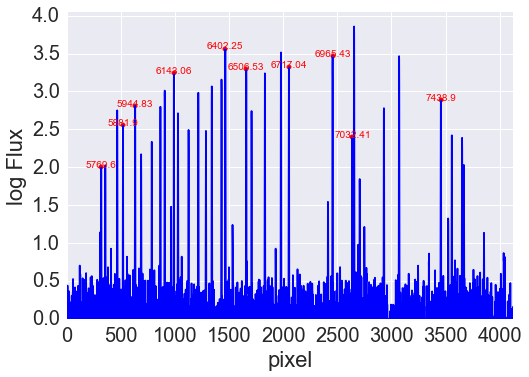

In [107]:
# IDs
plt.clf()
yspec = np.log10(np.maximum(spec,1))
xpk = id_dict['id_pix']
xplt = np.arange(spec.size)
plt.plot(xplt,yspec,'b-')
plt.scatter(xpk,yspec[np.round(xpk).astype(int)],color='red')
# Guesses
for jj,xpixpk in enumerate(id_dict['id_pix']):
    plt.text(xpixpk, yspec[int(np.round(xpixpk))], '{:g}'.format(id_dict['id_wave'][jj]),
         ha='center',color='red')
#
plt.ylim(0.,np.max(yspec)*1.05)
plt.xlim(0,spec.size)
plt.xlabel('pixel')
plt.ylabel('log Flux')
plt.show()
plt.close()

#### Now the rest

In [50]:
desiboot.id_remainder(id_dict, pixpk, llist)

#### Final fit wave vs. pix too

In [51]:
final_fit, mask = dufits.iter_fit(np.array(id_dict['id_wave']), np.array(id_dict['id_pix']), 'polynomial', 3, xmin=0., xmax=1.)
rms = np.sqrt(np.mean((dufits.func_val(np.array(id_dict['id_wave'])[mask==0], final_fit)-np.array(id_dict['id_pix'])[mask==0])**2))
final_fit_pix,mask2 = dufits.iter_fit(np.array(id_dict['id_pix']), np.array(id_dict['id_wave']),'legendre',4, niter=5) 

In [52]:
print("RMS = {:g}".format(rms))

RMS = 6.29168
